In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<H2>Load Data</H2>

In [3]:
data = pd.read_parquet('..\data\owf.Extract.01.parquet')

In [4]:
data.head().T

DATE,1937-03-01,1937-03-02,1937-03-03,1937-03-04,1937-03-05
CLOUD COVER (okta),NaN,NaN,NaN,NaN,NaN
Q_CC,9,9,9,9,9
WIND DIRECTION (degrees),0.0,0.0,0.0,0.0,0.0
Q_DD,0,0,0,0,0
WIND SPEED (m/s),NaN,NaN,NaN,NaN,NaN
Q_FG,9,9,9,9,9
WIND GUST (m/s),NaN,NaN,NaN,NaN,NaN
Q_FX,9,9,9,9,9
RELATIVE HUMIDITY,NaN,NaN,NaN,NaN,NaN
Q_HU,9,9,9,9,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44591 entries, 1937-03-01 to 1930-12-31
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         25658 non-null  float64
 1   Q_CC                       30712 non-null  Int64  
 2   WIND DIRECTION (degrees)   30462 non-null  float64
 3   Q_DD                       32963 non-null  Int64  
 4   WIND SPEED (m/s)           25658 non-null  float64
 5   Q_FG                       32963 non-null  Int64  
 6   WIND GUST (m/s)            14334 non-null  float64
 7   Q_FX                       32963 non-null  Int64  
 8   RELATIVE HUMIDITY          25658 non-null  float64
 9   Q_HU                       30712 non-null  Int64  
 10  SEA LEVEL PRESSURE (hPa)   23466 non-null  float64
 11  Q_PP                       30712 non-null  Int64  
 12  GLOBAL RADIATION (W/m2)    24172 non-null  float64
 13  Q_QQ                       25

In [6]:
print('Number of duplicate dates:', data.index.duplicated().sum())

Number of duplicate dates: 0


In [7]:
qi = {'CLOUD COVER (okta)' : 'Q_CC',
      'WIND DIRECTION (degrees)' : 'Q_DD',
      'WIND SPEED (m/s)' : 'Q_FG',
      'WIND GUST (m/s)' : 'Q_FX',
      'RELATIVE HUMIDITY' : 'Q_HU',
      'SEA LEVEL PRESSURE (hPa)' : 'Q_PP',
      'GLOBAL RADIATION (W/m2)' : 'Q_QQ',
      'PRECIPITATION AMOUNT (mm)' : 'Q_RR',
      'SUNSHINE (hours)' : 'Q_SS',
      'MEAN TEMPERATURE (C)' : 'Q_TG',
      'MINIMUM TEMPERATURE (C)' : 'Q_TN',
      'MAXIMUM TEMPERATURE (C)' : 'Q_TX'}

In [8]:
(data[[*qi.values()]] == 1).sum(axis=0)

Q_CC     0
Q_DD    25
Q_FG     0
Q_FX     0
Q_HU     0
Q_PP     0
Q_QQ    24
Q_RR     0
Q_SS    31
Q_TG     3
Q_TN     3
Q_TX     0
dtype: Int32

In [9]:
suspected = {key : value for key, value in qi.items() if (data[value]==1).sum(axis=0) != 0}
suspected

{'WIND DIRECTION (degrees)': 'Q_DD',
 'GLOBAL RADIATION (W/m2)': 'Q_QQ',
 'SUNSHINE (hours)': 'Q_SS',
 'MEAN TEMPERATURE (C)': 'Q_TG',
 'MINIMUM TEMPERATURE (C)': 'Q_TN'}

<P>Let us find if are non-NA data with corresponding NA indicator values.</P>

In [10]:
{key : (data[value].isna() & data[key].notna()).sum() for key, value in suspected.items()}

{'WIND DIRECTION (degrees)': 0,
 'GLOBAL RADIATION (W/m2)': 0,
 'SUNSHINE (hours)': 0,
 'MEAN TEMPERATURE (C)': 0,
 'MINIMUM TEMPERATURE (C)': 0}

<P>Let's see where the suspected values lie in the data.</P>

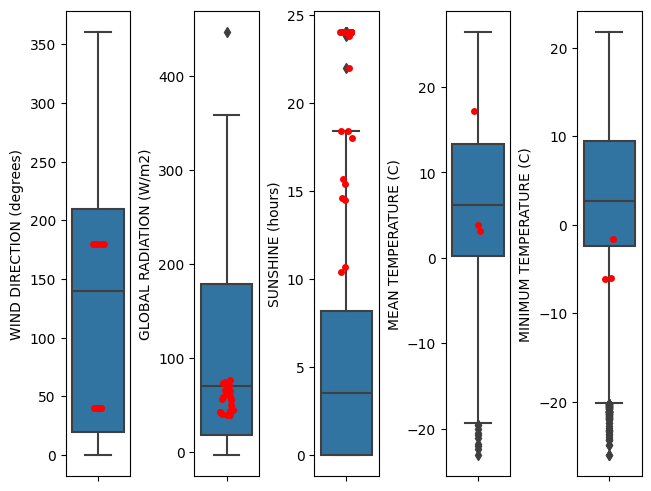

In [11]:
fig, axs = plt.subplots(nrows=1,
                        ncols=len(suspected),
                        layout='constrained')

for index, (key, value) in enumerate(suspected.items()):
    sns.boxplot(data=data,
                y=key,
                ax=axs[index])
    sns.stripplot(data[data[value]==1],
                  y=key,
                  color='red',
                  legend=False,
                  ax=axs[index])
plt.show()

<P>Except the Sunshine data rest of the data don't look extreme. Let's explore Sunshine data bit further.</P>

In [12]:
data[data['Q_SS']==1]['SUNSHINE (hours)']

DATE
2006-10-09    10.7
2006-10-10    15.7
2006-11-11    14.5
2006-11-12    24.0
2006-11-13    24.0
2006-11-14    24.0
2006-11-15    24.0
2006-11-16    24.0
2006-11-17    24.0
2006-11-18    24.0
2006-11-19    24.0
2006-11-20    24.0
2006-11-21    24.0
2006-11-22    24.0
2006-11-23    24.0
2006-11-24    24.0
2006-11-25    24.0
2006-11-26    24.0
2006-11-27    18.0
2006-11-29    14.6
2006-11-30    24.0
2006-12-01    24.0
2006-12-02    24.0
2006-12-03    24.0
2006-12-04    24.0
2006-12-05    23.8
2006-12-06    22.0
2006-12-07    10.4
2009-04-17    18.4
2009-09-09    15.4
2009-09-10    18.4
Name: SUNSHINE (hours), dtype: float64

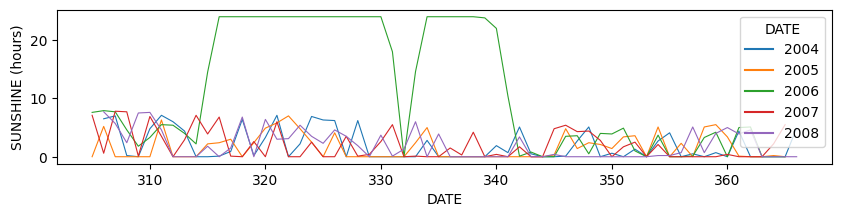

In [19]:
mask = (data.index.year > 2003) & (data.index.year < 2009) & (data.index.month > 10)

f = plt.figure(figsize=(10, 2))
g = sns.lineplot(data=data[mask],
                 x=data[mask].index.dayofyear,
                 y='SUNSHINE (hours)',
                 hue=data[mask].index.year,
                 palette='tab10',
                 linewidth=.8)
plt.show()

In [20]:
df = data.copy()

In [21]:
df.loc[data['Q_SS']==1, 'SUNSHINE (hours)'] = np.nan

In [22]:
df.drop(columns=[*qi.values()], inplace=True)

In [23]:
df.sample(5).T

DATE,1962-10-01,1991-11-20,1984-04-01,1940-05-24,2018-03-03
CLOUD COVER (okta),8.0,0.0,2.0,NaN,8.0
WIND DIRECTION (degrees),170.0,250.0,40.0,0.0,41.0
WIND SPEED (m/s),2.6,1.0,6.0,NaN,2.6
WIND GUST (m/s),NaN,10.3,14.4,NaN,10.2
RELATIVE HUMIDITY,94.0,84.0,37.0,NaN,63.0
SEA LEVEL PRESSURE (hPa),1015.1,1024.6,1014.6,NaN,1014.7
GLOBAL RADIATION (W/m2),41.0,30.0,183.0,NaN,61.0
PRECIPITATION AMOUNT (mm),1.0,0.0,0.0,3.2,0.0
SUNSHINE (hours),0.6,6.0,10.7,NaN,0.1
MEAN TEMPERATURE (C),12.1,-6.5,1.9,16.4,-5.8


<H2>Fill in Missing Data</H2>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44591 entries, 1937-03-01 to 1930-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         25658 non-null  float64
 1   WIND DIRECTION (degrees)   30462 non-null  float64
 2   WIND SPEED (m/s)           25658 non-null  float64
 3   WIND GUST (m/s)            14334 non-null  float64
 4   RELATIVE HUMIDITY          25658 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   23466 non-null  float64
 6   GLOBAL RADIATION (W/m2)    24172 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  44285 non-null  float64
 8   SUNSHINE (hours)           24031 non-null  float64
 9   MEAN TEMPERATURE (C)       30740 non-null  float64
 10  MINIMUM TEMPERATURE (C)    30771 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    30712 non-null  float64
dtypes: float64(12)
memory usage: 5.4 MB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLOUD COVER (okta),25658.0,5.420142,2.343191,0.0,4.0,6.0,8.0,8.0
WIND DIRECTION (degrees),30462.0,125.577671,106.451291,0.0,20.0,140.0,210.0,360.0
WIND SPEED (m/s),25658.0,2.693012,1.615270,0.0,1.5,2.4,3.5,14.4
WIND GUST (m/s),14334.0,9.407332,3.648416,1.0,6.7,9.3,11.6,28.8
RELATIVE HUMIDITY,25658.0,73.693624,15.968670,18.0,62.0,76.0,87.0,100.0
SEA LEVEL PRESSURE (hPa),23466.0,1011.637672,12.102957,954.5,1004.1,1012.1,1019.8,1053.4
GLOBAL RADIATION (W/m2),24172.0,105.213925,97.628581,-3.0,18.0,70.0,179.0,446.0
PRECIPITATION AMOUNT (mm),44285.0,2.012952,4.536088,0.0,0.0,0.0,1.8,72.8
SUNSHINE (hours),24031.0,4.621302,4.670334,0.0,0.0,3.5,8.2,17.5
MEAN TEMPERATURE (C),30740.0,6.250553,8.361652,-23.1,0.2,6.2,13.3,26.4


In [26]:
df.isna().sum()

CLOUD COVER (okta)           18933
WIND DIRECTION (degrees)     14129
WIND SPEED (m/s)             18933
WIND GUST (m/s)              30257
RELATIVE HUMIDITY            18933
SEA LEVEL PRESSURE (hPa)     21125
GLOBAL RADIATION (W/m2)      20419
PRECIPITATION AMOUNT (mm)      306
SUNSHINE (hours)             20560
MEAN TEMPERATURE (C)         13851
MINIMUM TEMPERATURE (C)      13820
MAXIMUM TEMPERATURE (C)      13879
dtype: int64

In [27]:
df[df.isna().all(axis=1)].index.year.value_counts()

DATE
2021    275
1899     30
Name: count, dtype: int64

In [28]:
df.isna().all(axis=0)

CLOUD COVER (okta)           False
WIND DIRECTION (degrees)     False
WIND SPEED (m/s)             False
WIND GUST (m/s)              False
RELATIVE HUMIDITY            False
SEA LEVEL PRESSURE (hPa)     False
GLOBAL RADIATION (W/m2)      False
PRECIPITATION AMOUNT (mm)    False
SUNSHINE (hours)             False
MEAN TEMPERATURE (C)         False
MINIMUM TEMPERATURE (C)      False
MAXIMUM TEMPERATURE (C)      False
dtype: bool

In [29]:
mask = (df.index.year > 1979) & (df.index.year < 2021)
df = df[mask]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  float64
 1   WIND DIRECTION (degrees)   14816 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14244 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14043 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           13902 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [31]:
columns = ['WIND DIRECTION (degrees)',
           'WIND GUST (m/s)',
           'GLOBAL RADIATION (W/m2)']

In [32]:
df[columns] = df[columns].fillna(df[columns].median())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  float64
 1   WIND DIRECTION (degrees)   14976 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14976 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           13902 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [34]:
df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,CLOUD COVER (okta),WIND DIRECTION (degrees),WIND SPEED (m/s),WIND GUST (m/s),RELATIVE HUMIDITY,SEA LEVEL PRESSURE (hPa),GLOBAL RADIATION (W/m2),PRECIPITATION AMOUNT (mm),SUNSHINE (hours),MEAN TEMPERATURE (C),MINIMUM TEMPERATURE (C),MAXIMUM TEMPERATURE (C)
CLOUD COVER (okta),1.00,-0.19,0.11,-0.01,0.60,-0.23,-0.45,0.35,-0.74,-0.06,0.07,-0.18
WIND DIRECTION (degrees),-0.19,1.00,-0.17,0.00,-0.13,-0.04,0.18,-0.10,0.23,0.18,0.13,0.22
WIND SPEED (m/s),0.11,-0.17,1.00,0.73,-0.24,-0.22,0.06,0.10,-0.01,0.09,0.12,0.05
WIND GUST (m/s),-0.01,0.00,0.73,1.00,-0.30,-0.31,0.10,0.10,0.06,0.15,0.17,0.14
RELATIVE HUMIDITY,0.60,-0.13,-0.24,-0.30,1.00,-0.18,-0.65,0.32,-0.72,-0.30,-0.18,-0.39
SEA LEVEL PRESSURE (hPa),-0.23,-0.04,-0.22,-0.31,-0.18,1.00,0.16,-0.25,0.23,-0.02,-0.08,0.02
GLOBAL RADIATION (W/m2),-0.45,0.18,0.06,0.10,-0.65,0.16,1.00,-0.17,0.87,0.67,0.55,0.75
PRECIPITATION AMOUNT (mm),0.35,-0.10,0.10,0.10,0.32,-0.25,-0.17,1.00,-0.29,0.08,0.14,0.03
SUNSHINE (hours),-0.74,0.23,-0.01,0.06,-0.72,0.23,0.87,-0.29,1.00,0.47,0.32,0.58
MEAN TEMPERATURE (C),-0.06,0.18,0.09,0.15,-0.30,-0.02,0.67,0.08,0.47,1.00,0.97,0.98


In [35]:
columns = ['CLOUD COVER (okta)',
           'RELATIVE HUMIDITY',
           'GLOBAL RADIATION (W/m2)',
           'MAXIMUM TEMPERATURE (C)',
           'SUNSHINE (hours)']

mask = df[columns].notna().all(axis=1)

X = df.loc[mask, columns[:-1]].values
y = df.loc[mask, columns[-1]].values
lm = LinearRegression().fit(X, y)

mask = df['SUNSHINE (hours)'].isna()
df.loc[mask, 'SUNSHINE (hours)'] = lm.predict(df.loc[mask, columns[:-1]].values)

In [36]:
mask = (df.index.year > 2003) & (df.index.year < 2009) & (df.index.month > 10)

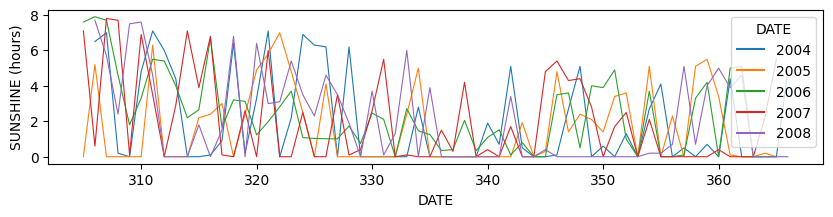

In [37]:
f = plt.figure(figsize=(10, 2))
g = sns.lineplot(data=df[mask],
                 x=df[mask].index.dayofyear,
                 y='SUNSHINE (hours)',
                 hue=df[mask].index.year,
                 palette='tab10',
                 linewidth=.8)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  float64
 1   WIND DIRECTION (degrees)   14976 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14976 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLOUD COVER (okta),14976.0,5.475294,2.259269,0.000000,4.0,6.0,8.00,8.000000
WIND DIRECTION (degrees),14976.0,157.045740,93.349283,0.000000,60.0,188.0,220.00,360.000000
WIND SPEED (m/s),14976.0,2.732652,1.422662,0.000000,1.7,2.5,3.40,11.700000
WIND GUST (m/s),14976.0,9.409635,3.558204,1.000000,7.0,9.3,11.30,28.800000
RELATIVE HUMIDITY,14976.0,72.909455,16.140504,19.000000,62.0,76.0,86.00,100.000000
SEA LEVEL PRESSURE (hPa),14976.0,1011.397823,12.179432,954.500000,1003.9,1011.9,1019.50,1053.400000
GLOBAL RADIATION (W/m2),14976.0,102.866386,94.678592,-3.000000,20.0,70.0,171.25,446.000000
PRECIPITATION AMOUNT (mm),14976.0,2.270593,4.955477,0.000000,0.0,0.0,2.20,72.800000
SUNSHINE (hours),14976.0,4.569589,4.538858,-1.039634,0.0,3.4,7.90,18.216231
MEAN TEMPERATURE (C),14976.0,6.705576,8.117707,-22.000000,0.7,6.6,13.50,25.900000


<H2>Encoding</H2>

<H3>Wind Direction</H3>

In [40]:
wind_direction = pd.cut(df['WIND DIRECTION (degrees)'],
                        bins=np.linspace(-11.25, 371.25, 18),
                        labels=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE',  'SE',  'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N'],
                        include_lowest=True, right=False,
                        ordered=False)
one_hot_wind_direction = pd.get_dummies(wind_direction, dtype=int)

In [41]:
df = pd.concat([df, one_hot_wind_direction], axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  float64
 1   WIND DIRECTION (degrees)   14976 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14976 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 12  E                          14976 non-null  int32  
 13  ENE                        14

<H3>Cloud Cover</H3>

In [43]:
df['CLOUD COVER (okta)'] = df['CLOUD COVER (okta)'].astype(int)

In [44]:
one_hot_oktas = pd.get_dummies(df['CLOUD COVER (okta)'], prefix='OKTA', prefix_sep=' ', dtype=int)

In [45]:
df = pd.concat([df, one_hot_oktas], axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  int32  
 1   WIND DIRECTION (degrees)   14976 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14976 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 12  E                          14976 non-null  int32  
 13  ENE                        14

In [47]:
df.head().T

DATE,1980-01-01,1980-01-02,1980-01-03,1980-01-04,1980-01-05
CLOUD COVER (okta),5.0,1.0,0.0,3.0,8.0
WIND DIRECTION (degrees),20.0,20.0,0.0,0.0,30.0
WIND SPEED (m/s),6.0,5.5,0.5,1.4,4.6
WIND GUST (m/s),9.3,9.3,9.3,9.3,9.3
RELATIVE HUMIDITY,64.0,55.0,68.0,69.0,72.0
SEA LEVEL PRESSURE (hPa),1003.8,1016.7,1021.0,1017.3,1013.0
GLOBAL RADIATION (W/m2),14.0,17.0,18.0,11.0,5.0
PRECIPITATION AMOUNT (mm),0.0,0.0,0.0,1.4,3.2
SUNSHINE (hours),3.3,4.6,5.1,1.6,0.0
MEAN TEMPERATURE (C),-3.7,-6.2,-11.5,-15.2,-7.2


In [48]:
df.to_parquet('..\data\owf.EDA.1980-2020.01.parquet', index=True)